<a href="https://colab.research.google.com/github/AmrutaMenon/Life_Expectancy_EDA/blob/main/Life_Expectancy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Life Expectancy** - *A statistical analysis on the factors influencing Life expectancy*







## **Objective**

The objective here is to find the factors that affect the Life Expectancy from the year 2000-2015. Apart from that there were different analysis conducted based upon the data.  

## About the data
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates, it was found that effect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations in this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.




*   The data was collected from kaggle - Life Expectancy data by WHO

*   Link to download the dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who



## **Data Description**

The dataset contained 22 columns and 2938 rows.

### *Columns*

*   **Country**
      
        Names of 193 Countries.

*   **Year**
      
        Years from 2000-2015 was taken into account.

*   **Status**

        Status of a Country: Developing and Developed.

*   **Life expectancy**

        Life expectancy in age.

*   **Adult Mortality**

        Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population).

*   **Infant Deaths**(death before his/her 1st birthday)

        Number of Infant Deaths per 1000 population.

*   **Alcohol**

        Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).

*   **Percentage Expenditure**

        Expenditure on health as a percentage of Gross Domestic Product per capita(%).


*   **Hepatitis B**

        Hepatitis B (HepB) immunization coverage among 1-year-olds (%).


*   **Measles**

        Measles - number of reported cases per 1000 population.


*   **BMI**

        Average Body Mass Index of entire population.


*   **Under-five Deaths**

        Number of under-five deaths per 1000 population.

*  **Polio**

        Polio (Pol3) immunization coverage among 1-year-olds (%).

*   **Total expenditure**

        General government expenditure on health as a percentage of total government expenditure (%).

*   **Diphtheria**

        Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).

*   **HIV/AIDS**

        Deaths per 1000 live births HIV/AIDS (0-4 years).

*   GDP

        Gross Domestic Product per capita (in USD).


*   **Population**

        Population of the country.


*   **Thinness 1-19 years**

        Prevalence of thinness among children and adolescents for Age 10 to 19 (%).

*   **Thinness 5-9 years**

        Prevalence of thinness among children for Age 5 to 9(%).

*   **Income composition of resources**

        Human Development Index in terms of income composition of resources (index ranging from 0 to 1).

*   **Schooling**
      
        Number of years of Schooling(years).














# Procedure

Initially, all the required packages were imported and the dataset was loaded. The data contained a healthy amount of missing values. During the pre-processing of the data, all the missing values were removed using bfill(), ffill() and drop() methods. During EDA, different insights were drawn based on each question and visualization was also done for a better understanding of the analysis.

## **Importing Packages**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Life Expectancy Data.csv')
df.head()

## Pre-Processing

In [3]:
# Renaming columns
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [ ]:
# Checking shape of dataset
df.shape

(2938, 22)

In [ ]:
# Column names
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [ ]:
# Total Number of Countries
df.Country.nunique()

193

In [ ]:
df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [ ]:
# Checking for null values in the columns
df.isnull().sum()


Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

## Data Cleaning

In [ ]:
# Cleaning dataset with non-null values
df=df[(df.GDP.notnull()) & (df.Population.notnull()) & (df.Schooling.notnull()) & (df.Income_Comp_Of_Resources.notnull())]
df.head()

In [ ]:
df.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy               1
Adult_Mortality               1
Infant_Deaths                 0
Alcohol                     146
Percentage_Exp                0
HepatitisB                  473
Measles                       0
BMI                          24
Under_Five_Deaths             0
Polio                        11
Tot_Exp                     142
Diphtheria                   11
HIV/AIDS                      0
GDP                           0
Population                    0
thinness_1to19_years         24
thinness_5to9_years          24
Income_Comp_Of_Resources      0
Schooling                     0
dtype: int64

    Data still countains null values

In [ ]:
# Filling missing columns using bfill and ffill
col_bfill=['Tot_Exp','Alcohol']
col_ffill=['HepatitisB','Polio','Diphtheria']

In [ ]:
df.loc[:,col_bfill]=df.loc[:,col_bfill].bfill()
df.loc[:,col_ffill]=df.loc[:,col_ffill].ffill()
df.isnull().sum()

Country                      0
Year                         0
Status                       0
Life_Expectancy              1
Adult_Mortality              1
Infant_Deaths                0
Alcohol                      0
Percentage_Exp               0
HepatitisB                   0
Measles                      0
BMI                         24
Under_Five_Deaths            0
Polio                        0
Tot_Exp                      0
Diphtheria                   0
HIV/AIDS                     0
GDP                          0
Population                   0
thinness_1to19_years        24
thinness_5to9_years         24
Income_Comp_Of_Resources     0
Schooling                    0
dtype: int64

In [ ]:
# index value of column with null values
print(df[df.Life_Expectancy.isnull()].index.tolist())
print(df[df.Adult_Mortality.isnull()].index.tolist())
print(df[df.thinness_1to19_years.isnull()].index.tolist())
print(df[df.thinness_5to9_years.isnull()].index.tolist())
print(df[df.BMI.isnull()].index.tolist())

[1958]
[1958]
[2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472]
[2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472]
[2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472]


In [ ]:
# dropping those missing values 
df.drop([1958,2409,2410,2411,2412,2413,2414,2415,2416,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472],inplace=True)

In [ ]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

    Now, the dataset is clean without any missing values.

## Exploratory Data Analysis

### Questions for Analysis

#### Analysis based on the target variable - Life_Expectancy:

1. What are the average life expectancies of each country from 2000-2015?

2. Does the alcohol consumption affect the life expectancy of people? 

3. According to 2015, which country has the highest life expectancy?

4.	Do densely populated countries tend to have lower life expectancy?

5.	What is the impact of Immunization coverage on life Expectancy?

6.	What is the impact of schooling on the lifespan of humans?

7. Should a country having a lower life expectancy value(< 65) increase its healthcare expenditure in order to improve its average lifespan?

8. What can we say about the life expectancy of a country having BMI>30?

#### Other analysis: 

9. Infant death in india during 2000-2015.

10. How GDP affect the status of a country?

11. What can one say about the average Infant deaths in developing and developed countries?

12. What are the rate of schooling in India from 2000-2015?

13. Which country has the highest infant death in the year 2015?

14. Which developing country has the least immunization and which developed country has the highest immunization?

15. What are the percentage of immunization coverage in India from 2000-2015?

### 1. What are the average life expectancies of each country from 2000-2015?

In [ ]:
avg=df.loc[:,'Life_Expectancy'].groupby(df['Country']).mean()
avg

In [ ]:
data=pd.DataFrame(avg).reset_index()
data

In [ ]:
plt.figure(figsize=(200,180))
plt.bar(data.Country,data.Life_Expectancy,width=0.5)
plt.title('Avg Life Expectancy of each country from 2000-2015',{'fontsize':100})
plt.xlabel('Country',{'fontsize':80})
plt.ylabel('Avg Life Expectancy',{'fontsize':100})
plt.xticks(rotation=90,fontsize=50)
plt.yticks(fontsize=30)
plt.show()

### Insights:

*   ### Countries having avg life expectancy above 80





In [ ]:
high_data=data[data.Life_Expectancy>80].reset_index(drop=True)
high_data    

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='Country',x='Life_Expectancy',data=high_data)
plt.title('Avg Life Expectancy above 80')
plt.show()



*   ### Status of country having avg life expectancy > 80



In [ ]:
# to get the status of those countries having avg life exp > 80
x=df.loc[:,'Life_Expectancy'].groupby([df.Country,df.Status]).mean()
x

Country      Status    
Afghanistan  Developing    58.19375
Albania      Developing    75.15625
Algeria      Developing    73.61875
Angola       Developing    49.01875
Argentina    Developing    75.15625
                             ...   
Uruguay      Developing    76.07500
Uzbekistan   Developing    68.03125
Vanuatu      Developing    71.38750
Zambia       Developing    53.90625
Zimbabwe     Developing    50.48750
Name: Life_Expectancy, Length: 141, dtype: float64

In [ ]:
X1=pd.DataFrame(x)
X1

,,Life_Expectancy
Country,Status,
Afghanistan,Developing,58.19375
Albania,Developing,75.15625
Algeria,Developing,73.61875
Angola,Developing,49.01875
Argentina,Developing,75.15625
...,...,...
Uruguay,Developing,76.07500
Uzbekistan,Developing,68.03125
Vanuatu,Developing,71.38750


In [ ]:
status_data=X1[X1.Life_Expectancy>80]
status_data.reset_index(inplace=True)
status_data

,Country,Status,Life_Expectancy
0,Australia,Developed,81.81250
1,Austria,Developed,81.48125
2,Belgium,Developed,80.68125
3,Canada,Developing,81.68750
4,Finland,Developing,80.71250
5,France,Developing,82.21875
6,Germany,Developed,81.17500
7,Greece,Developing,81.21875
8,Iceland,Developed,82.44375
9,Ireland,Developed,80.15000


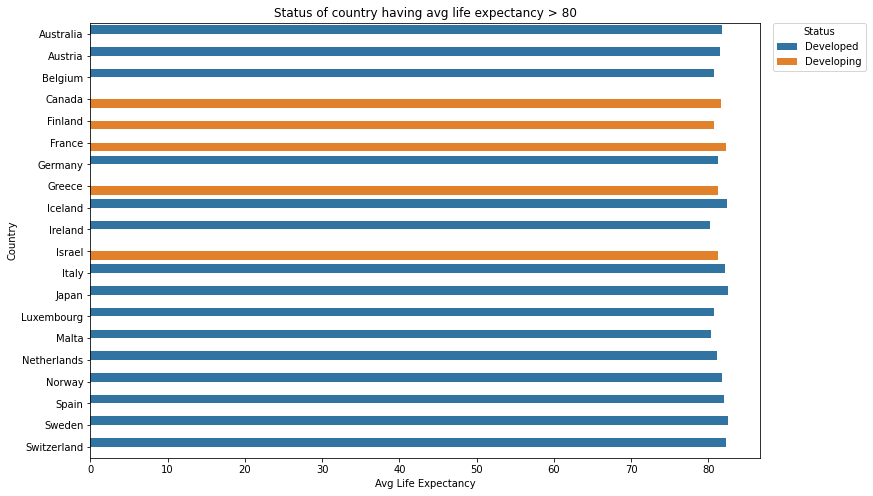

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='Country',x='Life_Expectancy',data=status_data,hue='Status')
plt.title('Status of country having avg life expectancy > 80')
plt.xlabel("Avg Life Expectancy")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Status')
plt.show()

Insights:

There are more developed countries having average life expecatancy > 80.

### 2. Does the alcohol comsumption affect the life expectancy of people?

In [ ]:
# finding correlation
df[['Alcohol','Life_Expectancy']].corr()

,Alcohol,Life_Expectancy
Alcohol,1.000000,0.425674
Life_Expectancy,0.425674,1.000000


In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Insights

LifeExpectancy has a negative correlation with adult mortality.

LifeExpectancy has strong correlatios with Schooling and Income composition of resources.

Strong correlation between thinness_1to19_years and thinness_5to9_years

There is a non-negligible correlation between LifeExpectancy and BMI and body diseases.

### 3. According to 2015, which country has the highest life expectancy?

In [ ]:
# Countries with highest life expectancy in 2015
LE_high=df[df['Year']==2015].loc[:,['Country','Year','Life_Expectancy']].reset_index()
LE_high

In [ ]:
LE_high.Life_Expectancy.idxmax()

In [ ]:
# country with high life expectancy
LE_high.iloc[113]

In [ ]:
LE_high.Life_Expectancy.idxmin()

In [ ]:
# country with lowest life expectancy
LE_high.iloc[112]

In [ ]:
plt.figure(figsize=(80,78))
sns.barplot(y='Country',x='Life_Expectancy',data=LE_high)
plt.title('Life Expectancy in 2015',{'fontsize': 80})
plt.xticks(rotation=90,fontsize=50)
plt.yticks(fontsize=30)
plt.show()

### Insights

According to 2015, the country with highest Life expectancy is Slovenia and the country with least Life Expectancy is Sierra Leone.

The highest Life expectancy is 88 and the least is 51 in the year 2015.

### 4.	Do densely populated countries tend to have lower life expectancy?

In [ ]:
# finding correlation
Pop=df[['Population','Life_Expectancy']].corr()
Pop

,Population,Life_Expectancy
Population,1.000000,-0.023097
Life_Expectancy,-0.023097,1.000000


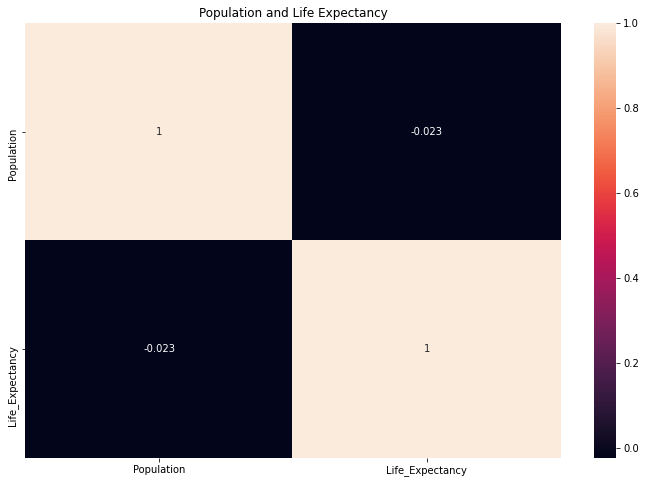

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(Pop,annot=True)
plt.title('Population and Life Expectancy')
plt.show()

In [ ]:
# Life expectancy of countries with greater population
Pop_high=df.groupby('Country')['Population','Life_Expectancy'].mean().sort_values(by='Population',ascending=False).head(20)
Pop_high.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


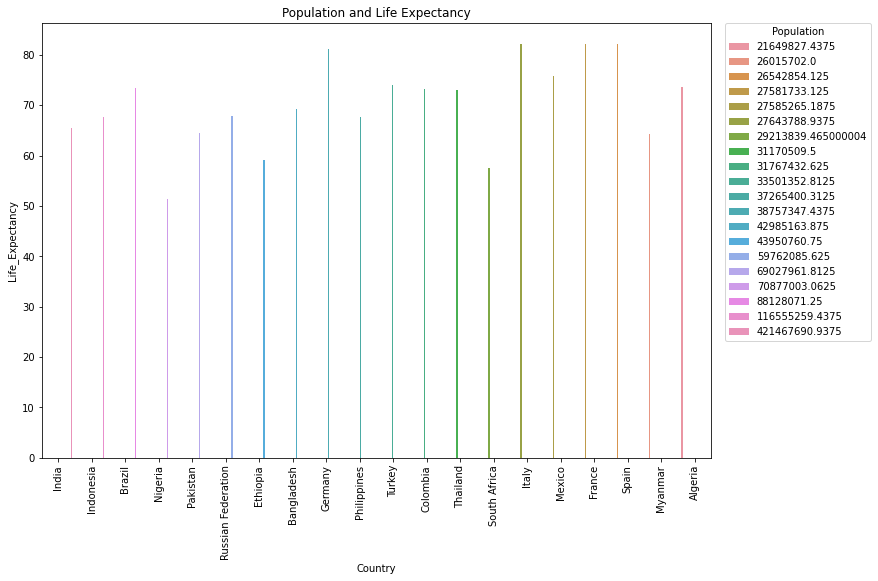

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Country',hue='Population',data=Pop_high,y='Life_Expectancy')
plt.title('Population and Life Expectancy')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Population')
plt.show()

In [ ]:
df.Life_Expectancy.max()

89.0

###Insights

Maximum value of life expectancy is 89.0. But from this graph, we can see that some countries with higher population have a higher life expectancy of more than 70.0 while some countries don't.

So we cannot say that countries with greater population tends to have lower life expectancy.

### 5.	What is the impact of Immunization coverage on life Expectancy?

In [ ]:
# Finding correlation
df[['Life_Expectancy','Polio','Diphtheria','HepatitisB']].corr().Life_Expectancy

Life_Expectancy    1.000000
Polio              0.432149
Diphtheria         0.453136
HepatitisB         0.211894
Name: Life_Expectancy, dtype: float64

### Insights

Life expectancy has a +ve correlation with all the immunizations.So the increase in immunization of Polio and Diphtheria will provide an increase in the Life_Expectancy over the nations world-wide.

### 6.	What is the impact of schooling on the lifespan of humans?

In [ ]:
# finding correlation
df[['Life_Expectancy','Schooling']].corr()

,Life_Expectancy,Schooling
Life_Expectancy,1.00000,0.76965
Schooling,0.76965,1.00000


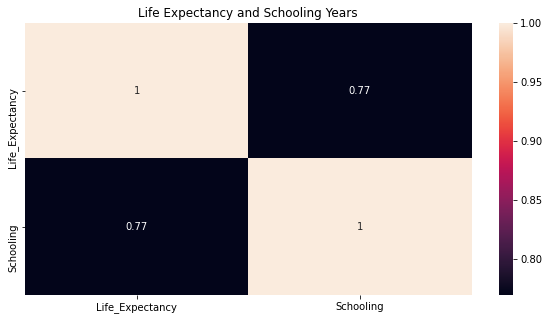

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Life_Expectancy','Schooling']].corr(),annot=True)
plt.title('Life Expectancy and Schooling Years')
plt.show()

### Insights

Schoolings have a positive correlation on the life span of humans,ie, People having higher education tends to live long.

### 7. Should a country having a lower life expectancy value(< 65) increase its healthcare expenditure in order to improve its average lifespan?

In [ ]:
# finding correlation
df[['Life_Expectancy','Tot_Exp']].corr()

,Life_Expectancy,Tot_Exp
Life_Expectancy,1.000000,0.238861
Tot_Exp,0.238861,1.000000


In [ ]:
# tot exp of country with life expectancy < 65
df[df['Life_Expectancy']<65].groupby('Country')['Life_Expectancy','Tot_Exp'].mean().sort_values(by='Tot_Exp',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Life_Expectancy,Tot_Exp
Country,,
Sierra Leone,46.112500,9.385625
Uganda,54.953333,8.525333
South Africa,56.733333,8.307333
Afghanistan,57.740000,8.258667
Swaziland,51.325000,7.430000
Lesotho,48.781250,7.233125
Burundi,55.537500,7.117500
Namibia,58.566667,7.106667
Malawi,49.893750,6.953750


In [ ]:
# tot exp of country with life expectancy > 65
df[df['Life_Expectancy']>65].groupby('Country')['Life_Expectancy','Tot_Exp'].mean().sort_values(by='Tot_Exp',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Life_Expectancy,Tot_Exp
Country,,
Sweden,82.518750,10.057500
Norway,81.793750,9.125625
Greece,81.218750,9.023750
Slovenia,79.731250,8.878750
Australia,81.812500,8.873125
...,...,...
Indonesia,67.556250,2.675000
Turkmenistan,65.757143,2.190000
Myanmar,65.900000,2.175714


### Insights

Since the total expenditure on health has very small correlation with Life expectancy and also from the two tables it is clear that the average expenditure on health on countries with life expectancy>65 is approximately the same as countries with life expectancy < 65.


So we cannot say that the countries having life expectancy < 65 should improve its health care expenditure.

### 8. What can we say about the life expectancy of a country having BMI>30?

In [ ]:
# finding correlation
df[['Life_Expectancy','BMI']].corr()

,Life_Expectancy,BMI
Life_Expectancy,1.000000,0.592809
BMI,0.592809,1.000000


In [ ]:
# Life expectancy of country with bmi>30
bmi=df[df['BMI']>30].groupby('Country')['Life_Expectancy','BMI'].mean().sort_values(by='BMI',ascending=False)
bmi.reset_index(inplace=True)
bmi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,Life_Expectancy,BMI
0,Kiribati,65.180000,73.553333
1,Tonga,72.542857,70.871429
2,Samoa,73.835714,70.807143
3,Malta,80.362500,66.181250
4,Canada,81.950000,62.942857
...,...,...,...
92,Mauritius,74.080000,32.300000
93,Lesotho,52.633333,32.000000
94,Swaziland,58.300000,31.766667
95,Zimbabwe,63.100000,31.550000


### Insights

Countries with higher BMI have higher life expectancy.

### 9. Infant death in india during 2000-2015.

In [ ]:
Ind_id=df[df['Country']=='India'].loc[:,['Country','Infant_Deaths','Year']]
Ind_id

,Country,Infant_Deaths,Year
1186,India,910,2015
1187,India,957,2014
1188,India,1000,2013
1189,India,1100,2012
1190,India,1100,2011
1191,India,1200,2010
1192,India,1300,2009
1193,India,1300,2008
1194,India,1400,2007
1195,India,1500,2006


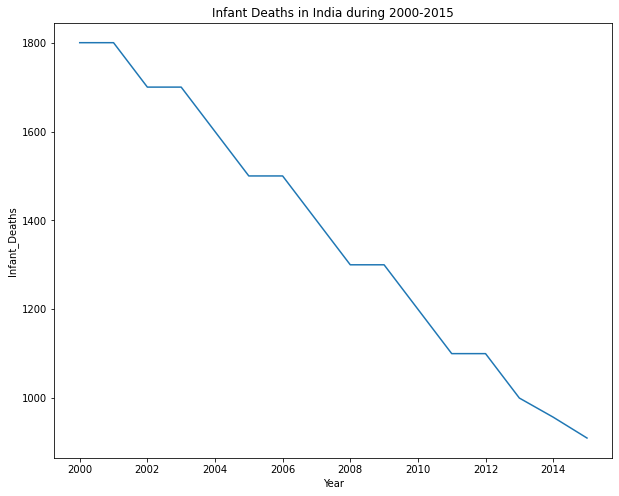

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year',y='Infant_Deaths',data=Ind_id)
plt.title('Infant Deaths in India during 2000-2015')
plt.show()

## Insights

Infant death was high in India during the year 2000 and 2001 of about 1800.

Afterwards there was a decline in the graph and in the coming years, the number decreased.

### 10. How GDP affect the status of a country?

In [ ]:
# finding mean
df.groupby('Status')['GDP'].mean()

Status
Developed     21920.352299
Developing     3213.791472
Name: GDP, dtype: float64

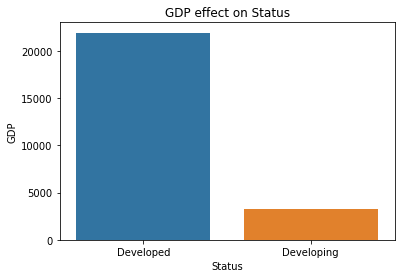

In [ ]:
sns.barplot(x=df.groupby('Status')['Status'].count().index,y=df.groupby('Status')['GDP'].mean(),data=df)
plt.title('GDP effect on Status')
plt.show()

### Insights

Developed countries has higher GDP compared to developing countries.

### 11. What can one say about the average Infant deaths in developing and developed countries

In [ ]:
df.groupby('Status')['Status'].count()

Status
Developed      416
Developing    1822
Name: Status, dtype: int64

In [ ]:
df.groupby('Status')['Infant_Deaths'].mean()

Status
Developed      0.692308
Developing    41.690450
Name: Infant_Deaths, dtype: float64

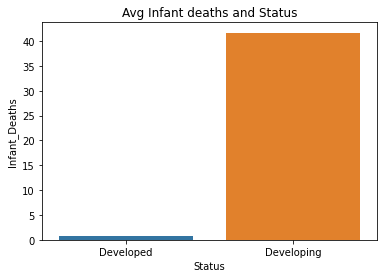

In [ ]:
sns.barplot(x=df.groupby('Status')['Status'].count().index,y=df.groupby('Status')['Infant_Deaths'].mean(),data=df)
plt.title('Avg Infant deaths and Status')
plt.show()

## Insights

Developing countries on an average have greater number of infant deaths as compared to developing countries.

### 12. What are the rate of schooling in India from 2000-2015?

In [ ]:
Ind_sch=df[df['Country']=='India'].loc[:,['Country','Schooling','Year']]
Ind_sch

,Country,Schooling,Year
1186,India,11.6,2015
1187,India,11.6,2014
1188,India,11.5,2013
1189,India,11.3,2012
1190,India,10.8,2011
1191,India,10.4,2010
1192,India,10.5,2009
1193,India,10.2,2008
1194,India,9.9,2007
1195,India,9.7,2006


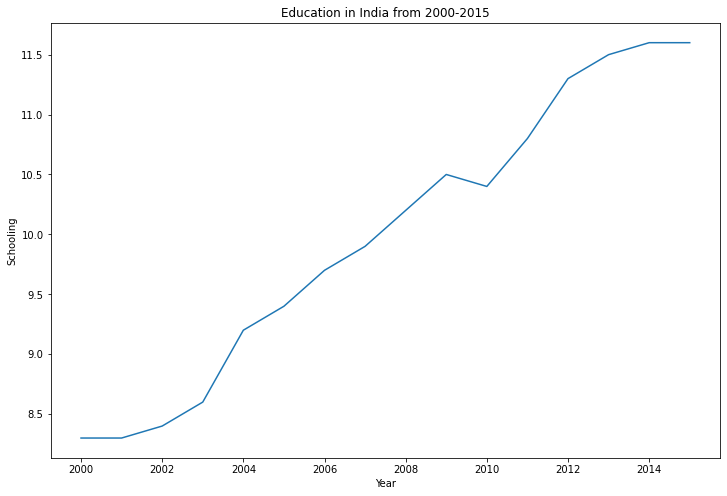

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year',y='Schooling',data=Ind_sch)
plt.title('Education in India from 2000-2015')
plt.show()

### Insights

In India, the number of years of schoolings goes on increasing each year but there was a slight decline in the year 2010 and then it kept on increasing.

### 13. Which country has the highest infant death in the year 2015?

In [ ]:
Inf=df[df['Year']==2015].loc[:,['Year','Country','Infant_Deaths']].reset_index()
Inf

,index,Year,Country,Infant_Deaths
0,0,2015,Afghanistan,62
1,16,2015,Albania,0
2,32,2015,Algeria,21
3,48,2015,Angola,66
4,80,2015,Argentina,8
...,...,...,...,...
133,2810,2015,Uruguay,0
134,2826,2015,Uzbekistan,15
135,2842,2015,Vanuatu,0
136,2906,2015,Zambia,27


In [ ]:

Inf.Infant_Deaths.idxmax()

58

In [ ]:
# country with highest infant death in the year 2015
Inf.iloc[58]

index             1186
Year              2015
Country          India
Infant_Deaths      910
Name: 58, dtype: object

In [ ]:
Inf.Infant_Deaths.min()

0

In [ ]:
# columns with infant death = 0
Inf[Inf['Infant_Deaths']==0]


,index,Year,Country,Infant_Deaths
1,16,2015,Albania,0
7,128,2015,Austria,0
10,224,2015,Belarus,0
11,240,2015,Belgium,0
12,256,2015,Belize,0
14,288,2015,Bhutan,0
15,320,2015,Bosnia and Herzegovina,0
18,384,2015,Bulgaria,0
21,448,2015,Cabo Verde,0
32,641,2015,Croatia,0


In [ ]:
# Finding total number of countries with infant death = 0
Inf[Inf['Infant_Deaths']==0].shape

(43, 4)

In [ ]:
plt.figure(figsize=(80,78))
sns.barplot(y='Country',x='Infant_Deaths',data=Inf)
plt.title('Infant Deaths in various Countries',{'fontsize':50})
plt.xticks(rotation=90,fontsize=50)
plt.yticks(fontsize=30)
plt.show()

### Insights

In the year 2015, the country with highest Infant deaths was India with a total of 910 deaths. Following India was Nigeria and Pakisthan.

There were 43 countries having 0 infant mortality rate. Some of them were Austria, Belarus, Hungary, Fiji, Sweden, Switzerland etc 

### 14. Which developing country has the least immunization and which developed country has the highest immunization?

In [ ]:
imm=df.groupby(['Status','Country'])['Diphtheria','Polio','HepatitisB'].mean().reset_index()
imm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Status,Country,Diphtheria,Polio,HepatitisB
0,Developed,Australia,86.8750,86.7500,93.4375
1,Developed,Austria,86.7500,86.0000,81.0625
2,Developed,Belgium,97.3125,97.7500,74.5000
3,Developed,Bulgaria,94.0000,94.2500,94.5000
4,Developed,Croatia,95.3750,95.5000,95.6875
...,...,...,...,...,...
136,Developing,Uruguay,89.1250,94.2500,94.3125
137,Developing,Uzbekistan,98.4375,98.5625,91.4375
138,Developing,Vanuatu,59.0625,66.1875,56.1250
139,Developing,Zambia,74.2500,64.3750,73.6250


In [ ]:
#max immunization for polio
imm[imm['Status']=='Developed'].Polio.idxmax()  # Hungary

8

In [ ]:
imm.iloc[8]

Status        Developed
Country         Hungary
Diphtheria           99
Polio           98.9375
HepatitisB           93
Name: 8, dtype: object

In [ ]:
#max immunization for diphtheria
imm[imm['Status']=='Developed'].Diphtheria.idxmax()  # Hungary

8

In [ ]:
#max immunization for HepatitisB
imm[imm['Status']=='Developed'].HepatitisB.idxmax()  # Poland

19

In [ ]:
imm.iloc[19]

Status        Developed
Country          Poland
Diphtheria        98.75
Polio             96.75
HepatitisB       97.375
Name: 19, dtype: object

In [ ]:
# min for polio
imm[imm['Status']=='Developing'].Polio.idxmin()  # Chad

48

In [ ]:
imm.iloc[48]

Status        Developing
Country             Chad
Diphtheria       26.8125
Polio             32.875
HepatitisB       23.4375
Name: 48, dtype: object

In [ ]:
# min for Diphtheria
imm[imm['Status']=='Developing'].Diphtheria.idxmin()  # Chad

48

In [ ]:
# min for HepatitisB                                  # Guinea
imm[imm['Status']=='Developing'].HepatitisB.idxmin()

58

In [ ]:
imm.iloc[58]

Status               Developing
Country       Equatorial Guinea
Diphtheria              29.9375
Polio                    36.875
HepatitisB                2.875
Name: 58, dtype: object

### Insights

Among the developed countries, Hungary has the highest immunization for polio and Diphtheria whereas Poland has highest HepatitisB immunization

Among the developing countries, Chad has very low immunization for Polio and Diphtheria and Guinea has the least HepatitisB immunization coverage.

### 15. What are the percentage of immunization coverage in India from 2000-2015?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


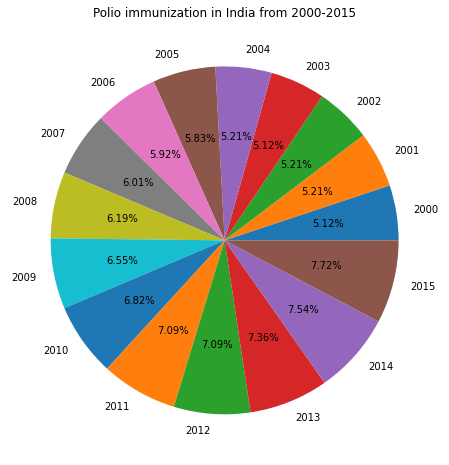

In [ ]:
# polio
plt.figure(figsize=(12,8))
plt.pie(df[df['Country']=='India'].groupby('Year')['Polio','HepatitisB','Diphtheria'].mean().reset_index().Polio,labels=df[df['Country']=='India'].groupby('Year')['Polio','HepatitisB','Diphtheria'].mean().reset_index().Year,autopct='%1.2f%%')
plt.title('Polio immunization in India from 2000-2015')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


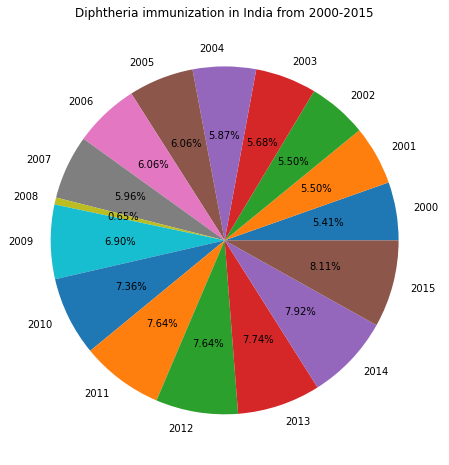

In [ ]:
# Diphtheria
plt.figure(figsize=(12,8))
plt.pie(df[df['Country']=='India'].groupby('Year')['Polio','HepatitisB','Diphtheria'].mean().reset_index().Diphtheria,labels=df[df['Country']=='India'].groupby('Year')['Polio','HepatitisB','Diphtheria'].mean().reset_index().Year,autopct='%1.2f%%')
plt.title('Diphtheria immunization in India from 2000-2015')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


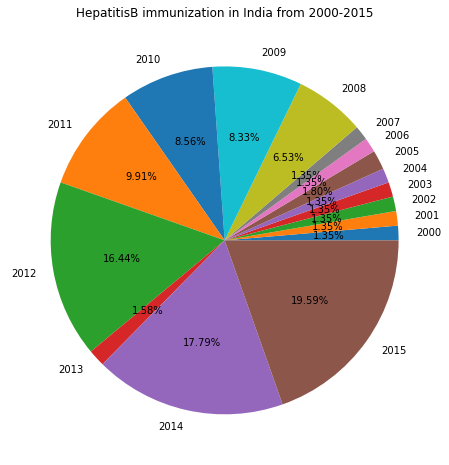

In [ ]:
# Hepatitis B
plt.figure(figsize=(12,8))
plt.pie(df[df['Country']=='India'].groupby('Year')['Polio','HepatitisB','Diphtheria'].mean().reset_index().HepatitisB,labels=df[df['Country']=='India'].groupby('Year')['Polio','HepatitisB','Diphtheria'].mean().reset_index().Year,autopct='%1.2f%%')
plt.title('HepatitisB immunization in India from 2000-2015')
plt.show()

### Insights

India has a greater percentage of immunization for Polio and Diphtheria from 2000-2015. But for HepatitisB, the coverage was least during 2000-2007 and then it started increasing.

## **Conclusion**

From the analysis, various insights were drawn. There are different factors that influence life expectancy such as BMI and body diseases, thinness_1to19_years and thinness_5to9_years, Schooling and Income composition of resources and adult mortality.

So to increase the life expectancy of people, the country should provide more immunization coverage and should also contribute to its total expenditure in health care.